In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

In [81]:
df = pd.read_csv('riceClassification.csv')

In [82]:
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [84]:
print(df.isnull().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


In [85]:
print(df['Class'].value_counts())

# current dataset is biased to 1

Class
1    9985
0    8200
Name: count, dtype: int64


In [86]:
df.describe()

# these values have very different ranges, might need to scale them to make them the same weight

# can just use standardscaler do it before training

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [87]:
# drop id, it provides 0 value

df.drop('id', axis=1, inplace=True)

In [88]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [89]:
# remove duplicates

df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

In [90]:
df

# no duplicates

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [91]:
df.info()

# literally all numeric values. no encoding needs to be done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


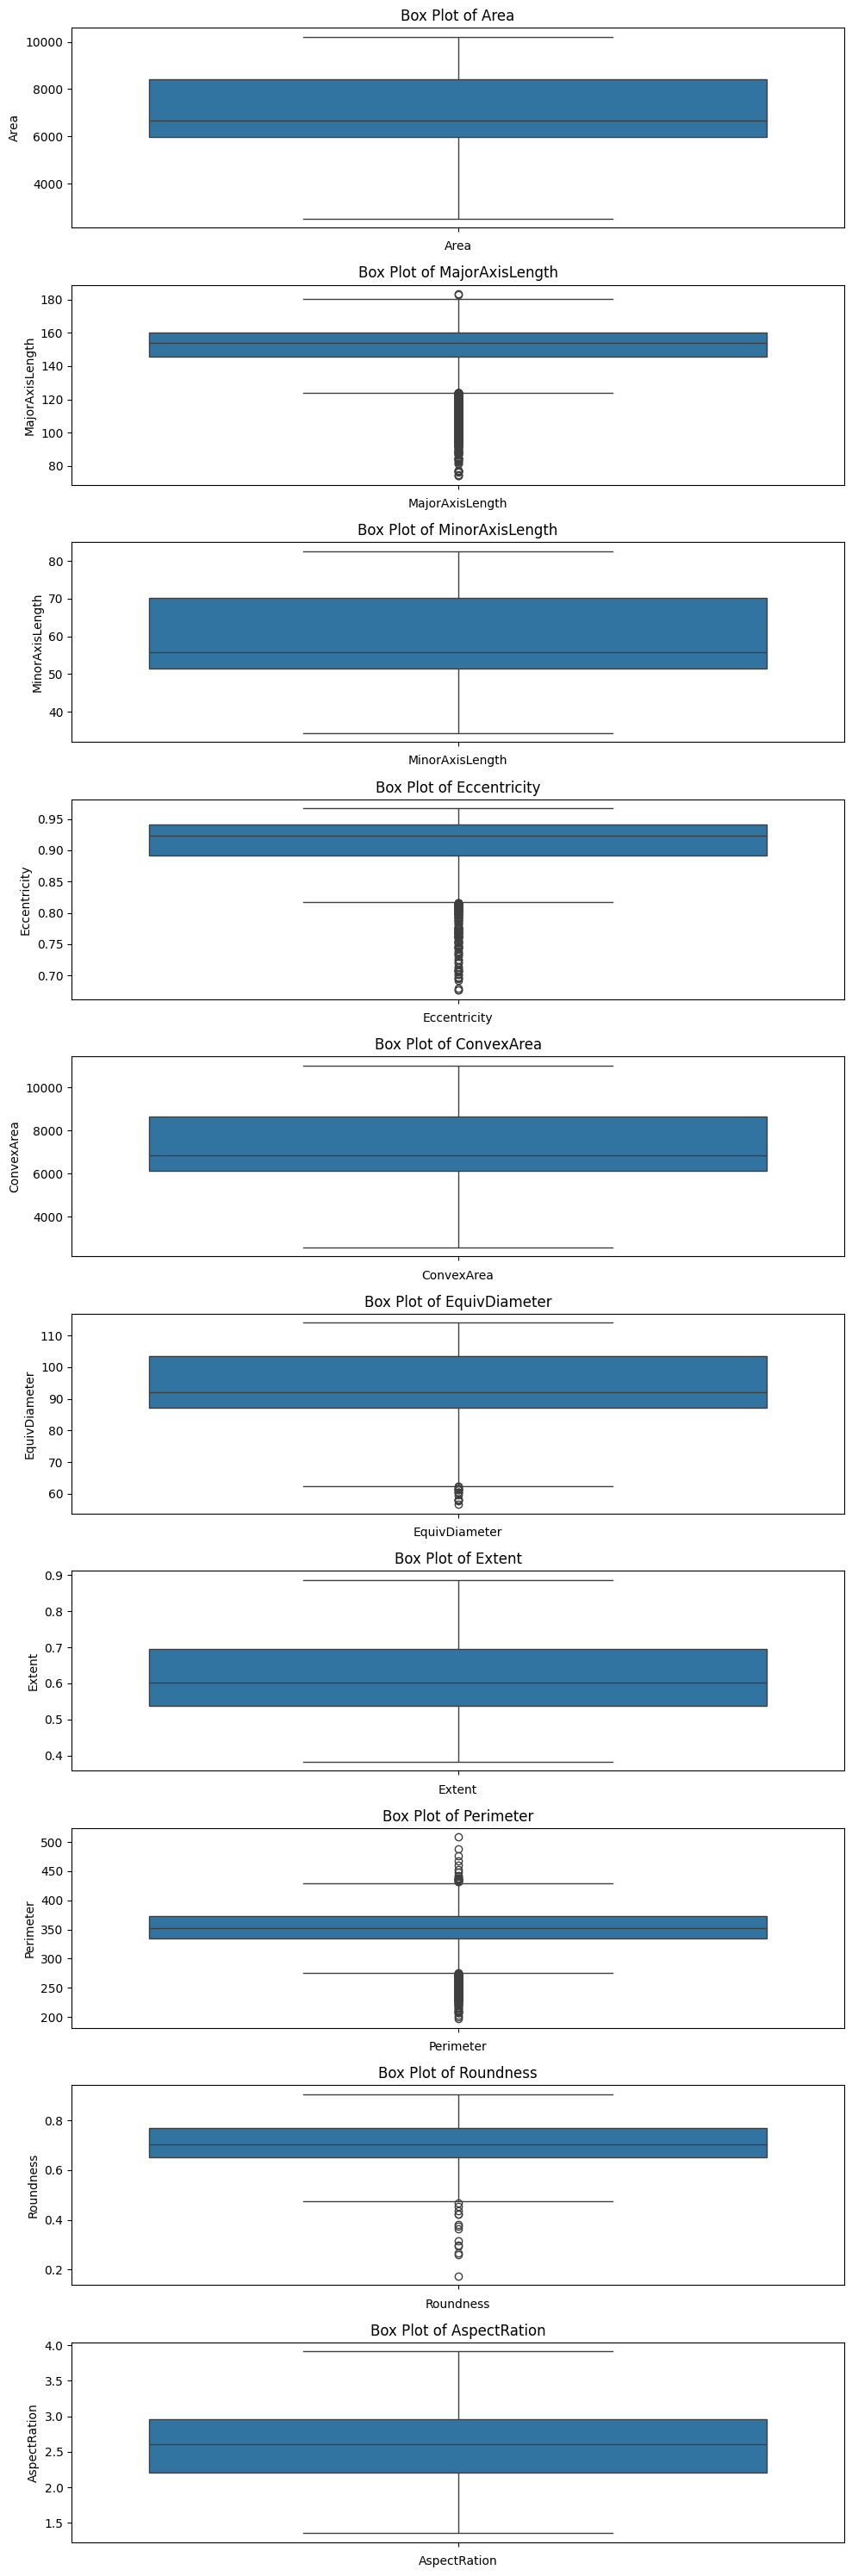

In [92]:
numerical_columns = ['Area', 'MajorAxisLength', 'MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']

plt.figure(figsize=(10, 30))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

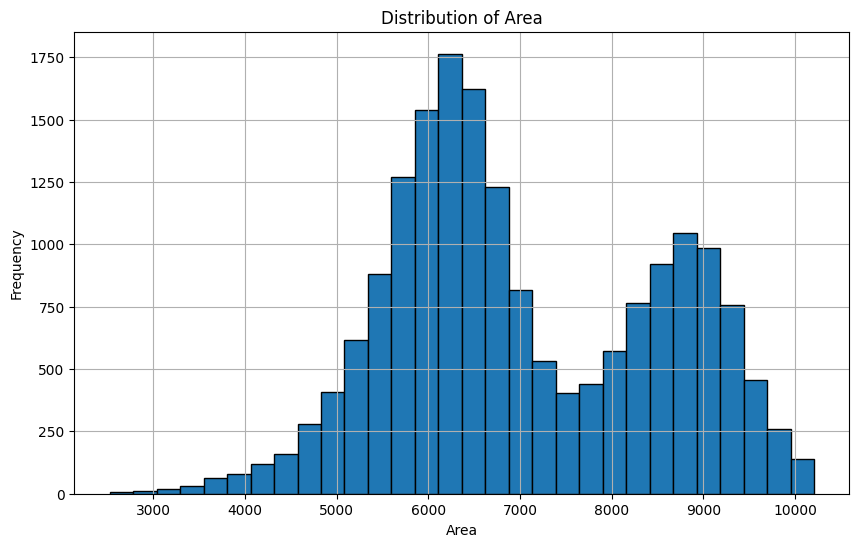

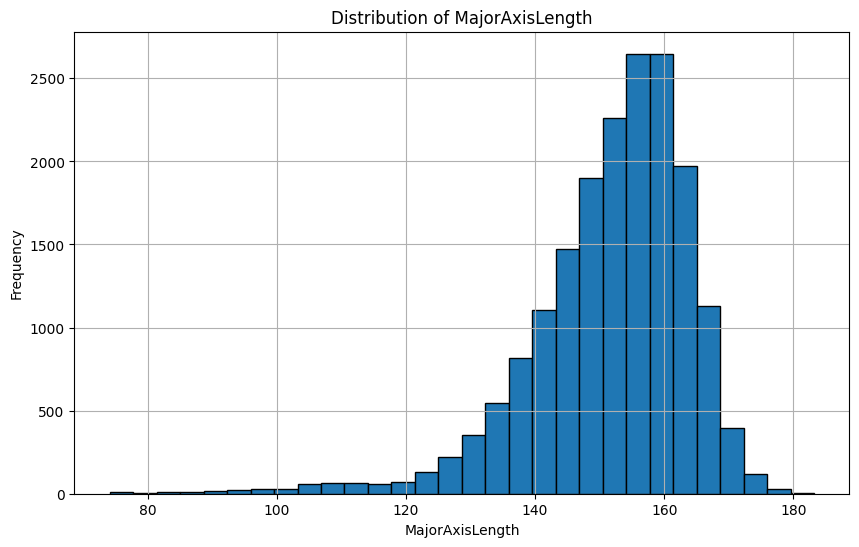

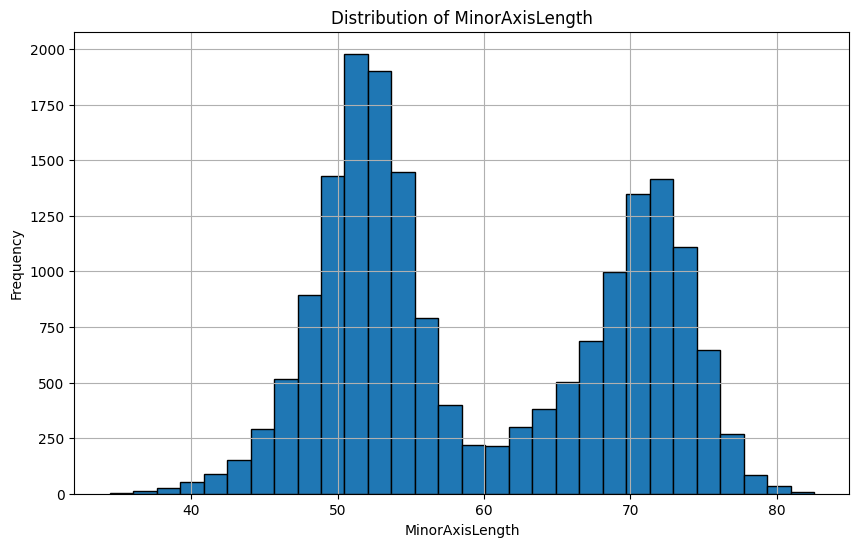

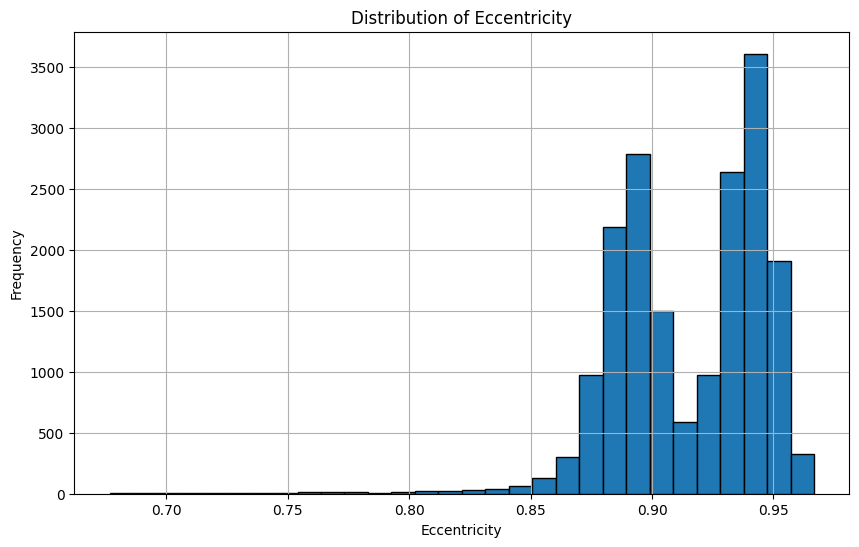

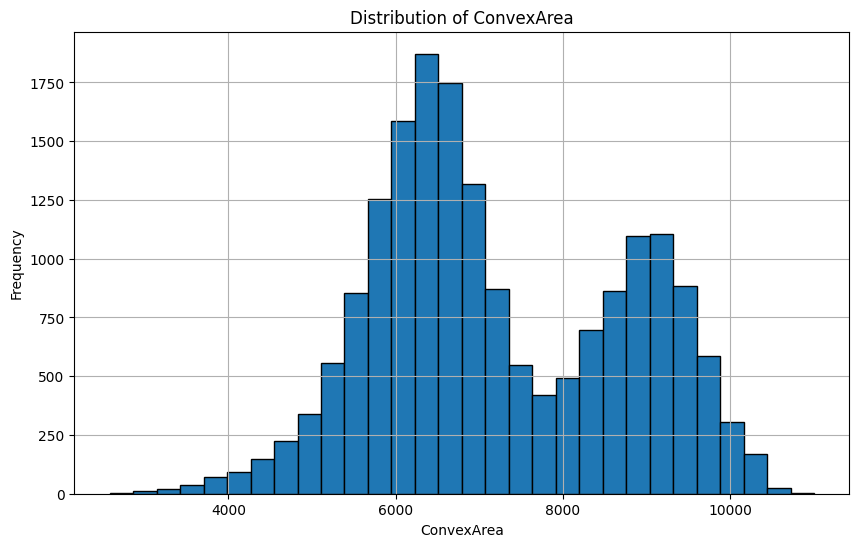

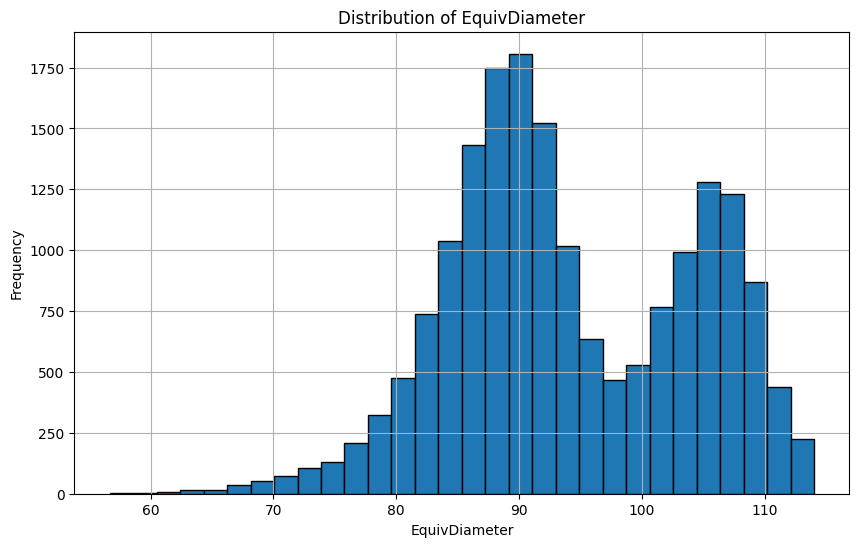

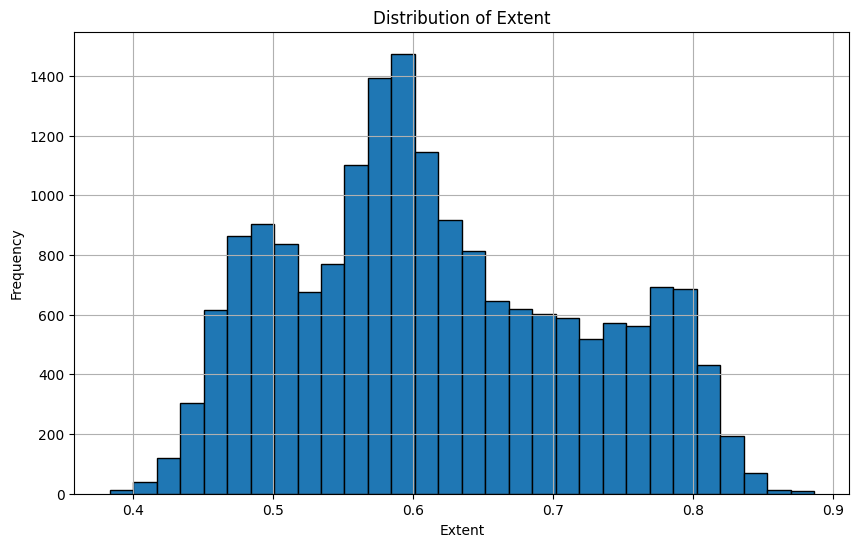

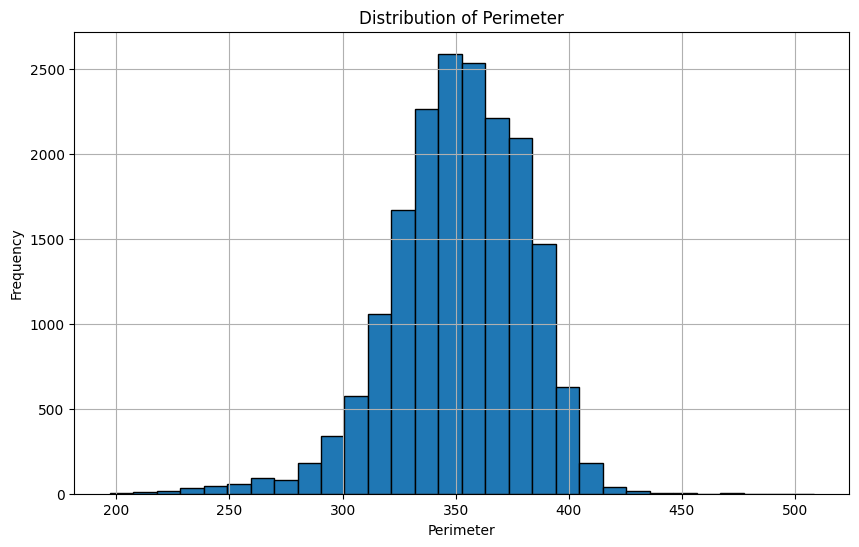

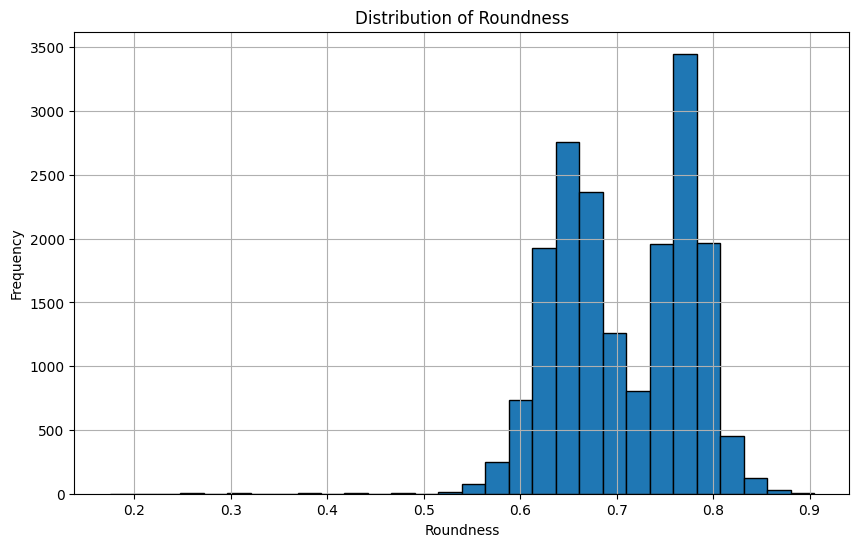

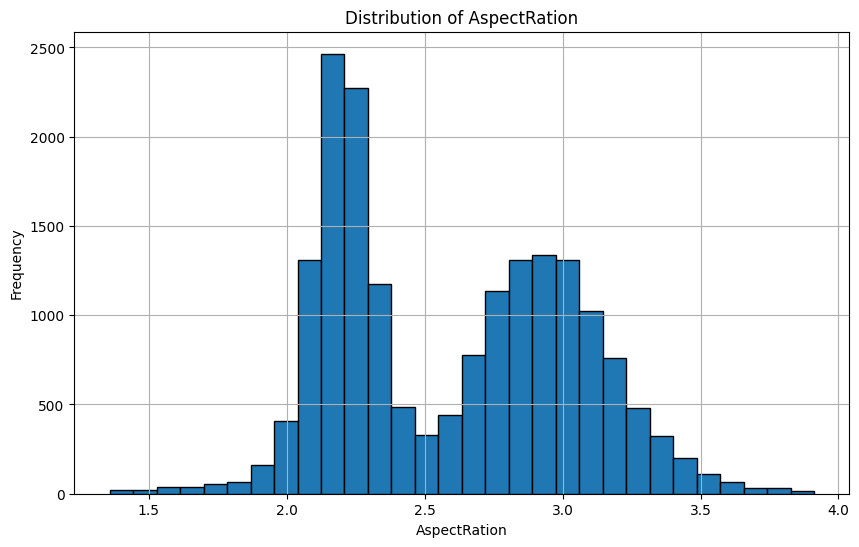

In [93]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

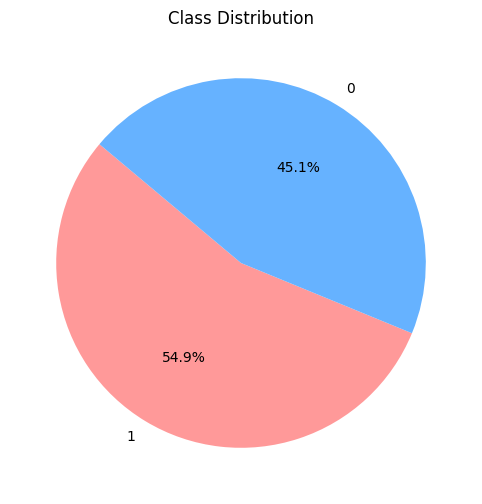

In [94]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF'])
plt.title('Class Distribution')
plt.show()

# this might lead to the model being skewed to class 1

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Class'])
y = df['Class']

underSampler = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = underSampler.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled.value_counts())

# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
# https://medium.com/game-of-bits/how-to-deal-with-imbalanced-data-in-classification-bd03cfc66066

Original class distribution:
 Class
1    9985
0    8200
Name: count, dtype: int64
Resampled class distribution:
 Class
0    8200
1    8200
Name: count, dtype: int64


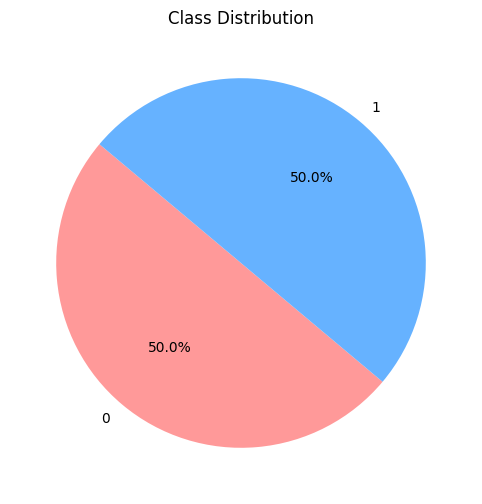

In [96]:
class_counts = df_resampled['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF'])
plt.title('Class Distribution')
plt.show()

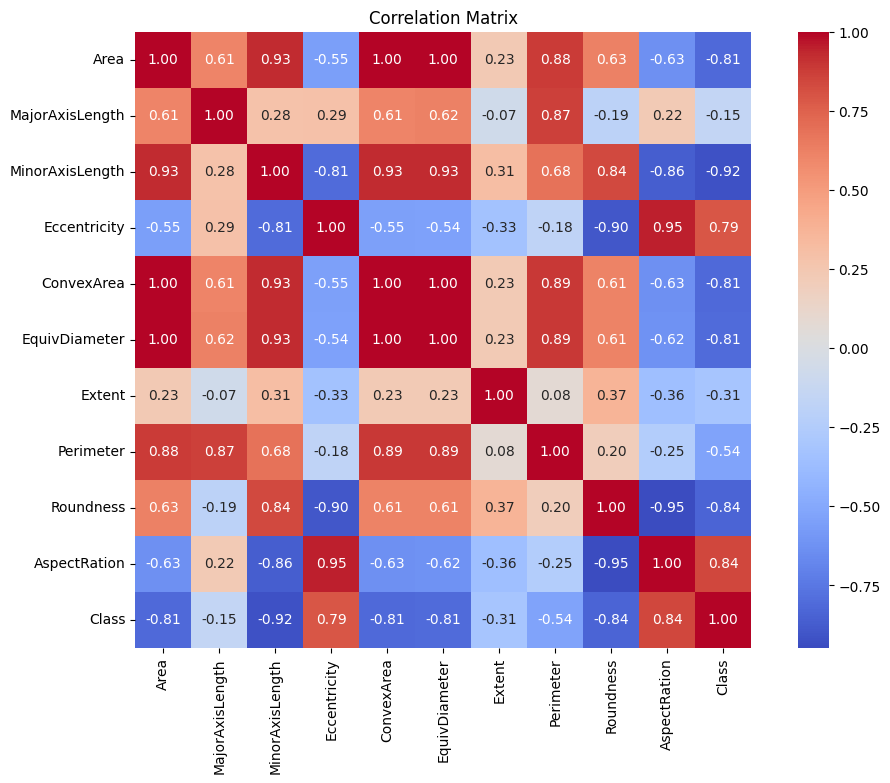

In [97]:
correlation_matrix = df_resampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [98]:
price_correlation = correlation_matrix['Class'].sort_values(ascending=False)
print(price_correlation)
# huge correlation, very good dataset

Class              1.000000
AspectRation       0.841132
Eccentricity       0.790505
MajorAxisLength   -0.149021
Extent            -0.308264
Perimeter         -0.535526
EquivDiameter     -0.809006
ConvexArea        -0.811374
Area              -0.813861
Roundness         -0.836431
MinorAxisLength   -0.916864
Name: Class, dtype: float64


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_resampled.drop(columns=['Class'])
y = df_resampled['Class']

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


GaussianNB()

In [ ]:
svm_pred = svm_model.predict(X_test)
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, svm_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Display the accuracy of each model
print("SVM Accuracy: {:.4f}".format(svm_accuracy))
print("Logistic Regression Accuracy: {:.4f}".format(log_reg_accuracy))
print("Random Forest Accuracy: {:.4f}".format(rf_accuracy))
print("KNN Accuracy: {:.4f}".format(knn_accuracy))

SVM Accuracy: 0.9866
Logistic Regression Accuracy: 0.9851
Random Forest Accuracy: 0.9866
KNN Accuracy: 0.9857
Naive Bayes Accuracy: 0.9793


Evaluation for SVM:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1665
           1       0.98      0.99      0.99      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



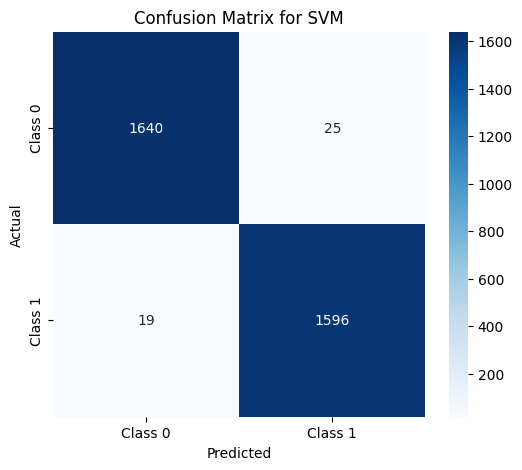

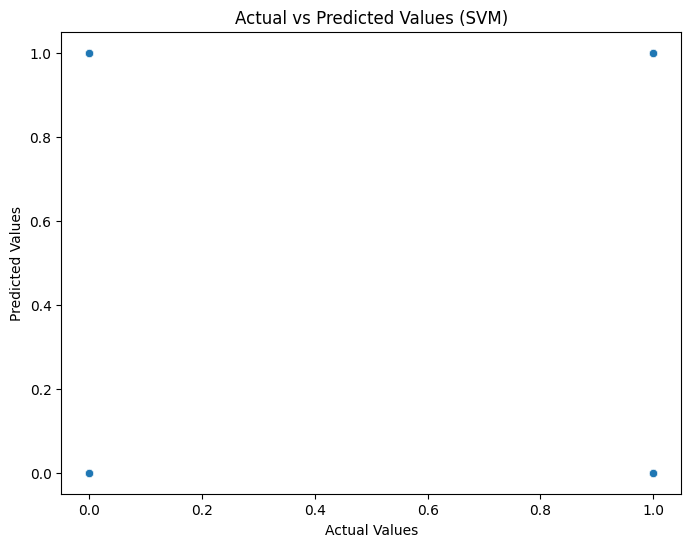

In [104]:
from sklearn.metrics import confusion_matrix

print(f"Evaluation for SVM:")
print(classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=svm_pred)
plt.title('Actual vs Predicted Values (SVM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1665
           1       0.98      0.99      0.98      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



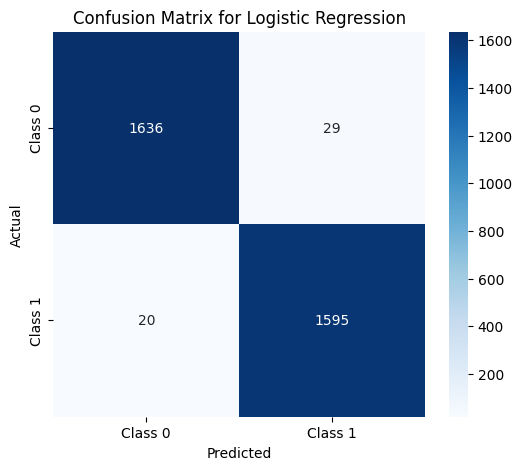

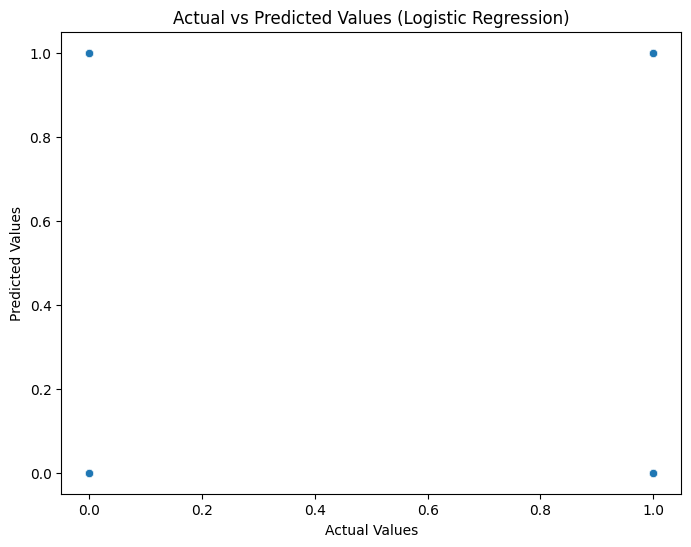

In [105]:
print(f"Evaluation for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))

cm = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=log_reg_pred)
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1665
           1       0.99      0.99      0.99      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



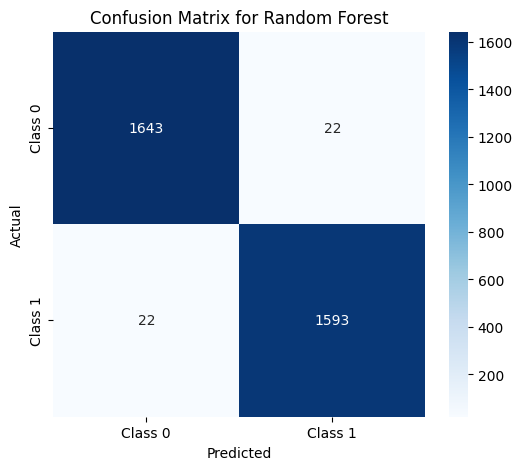

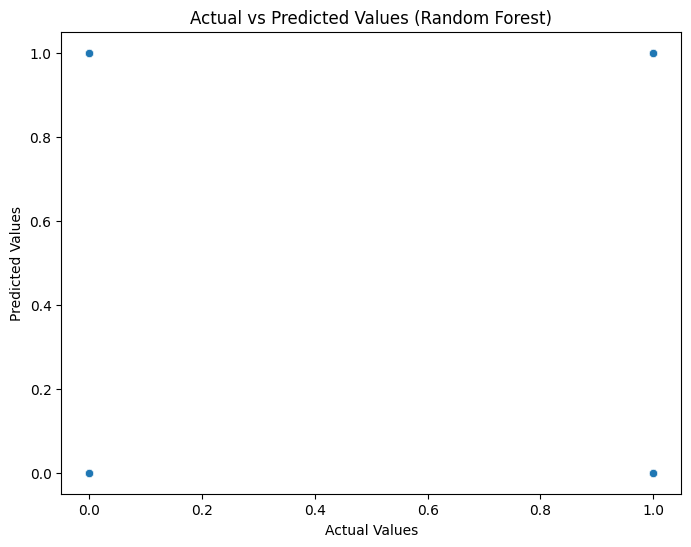

In [106]:
print(f"Evaluation for Random Forest:")
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Evaluation for KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1665
           1       0.99      0.99      0.99      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



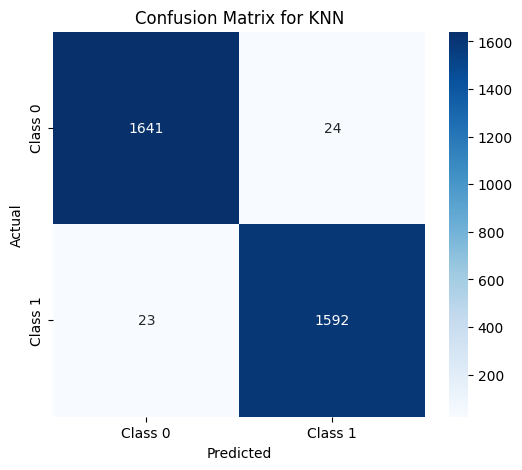

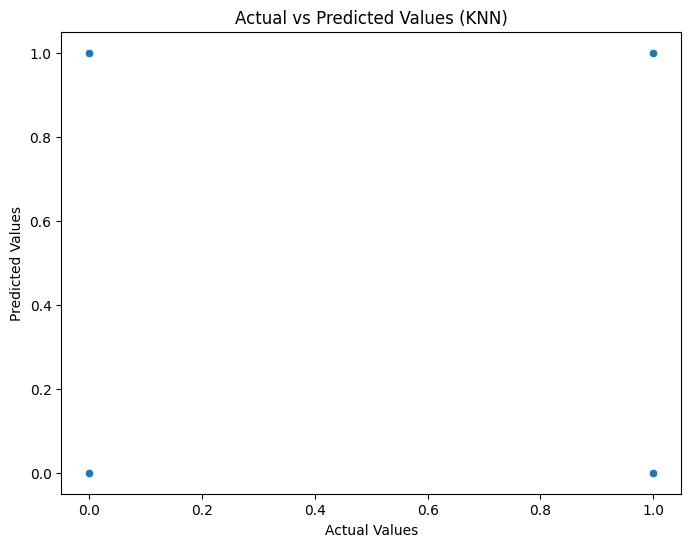

In [107]:
print(f"Evaluation for KNN:")
print(classification_report(y_test, knn_pred))

cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for KNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=knn_pred)
plt.title('Actual vs Predicted Values (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [109]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

# https://aneesha.medium.com/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [110]:
best_params = svc_param_selection(X_train, y_train, nfolds=5)

print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1}


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1665
           1       0.99      0.99      0.99      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



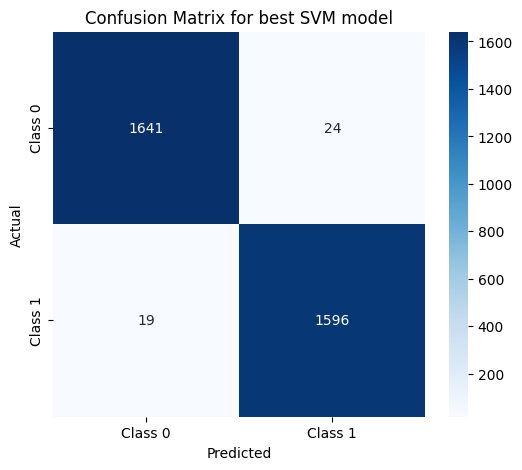

In [111]:
best_svm_model = SVC(kernel='rbf', C=10, gamma=0.1)

best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for best SVM model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [112]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_

print(f"Best Random Forest Parameters: {best_rf_params}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1665
           1       0.98      0.99      0.99      1615

    accuracy                           0.99      3280
   macro avg       0.99      0.99      0.99      3280
weighted avg       0.99      0.99      0.99      3280



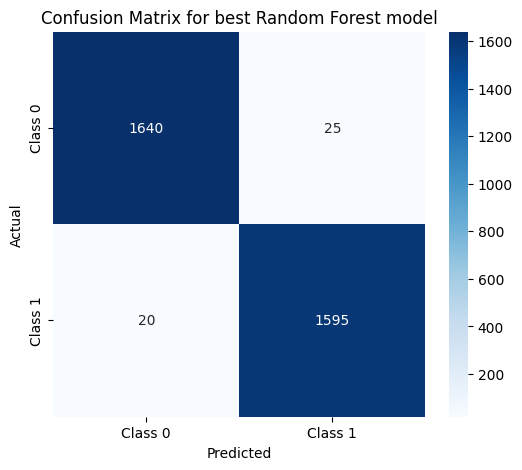

In [113]:
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 100
}

rf_model = RandomForestClassifier(**best_params, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f"Confusion Matrix for best Random Forest model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()